In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('supply_chain_data.csv')

# Initial inspection
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [2]:
#Data Types and Non-Null Counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
#Summary Statistics for Numerical Columns
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [4]:
# Check for missing values
print(df.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [5]:
# Convert 'Inspection results' to a categorical type if it's currently 'object'
print("\n--- Unique values in 'Inspection results' ---")
print(df['Inspection results'].unique())
# Assuming 'Pass', 'Fail', 'Pending' are the main values, we can map them for numerical analysis


--- Unique values in 'Inspection results' ---
['Pending' 'Fail' 'Pass']


In [6]:
# Clean column names for easier access (e.g., replace spaces with underscores)
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['Product_type', 'SKU', 'Price', 'Availability',
       'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics',
       'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
       'Shipping_carriers', 'Shipping_costs', 'Supplier_name', 'Location',
       'Lead_time', 'Production_volumes', 'Manufacturing_lead_time',
       'Manufacturing_costs', 'Inspection_results', 'Defect_rates',
       'Transportation_modes', 'Routes', 'Costs'],
      dtype='object')


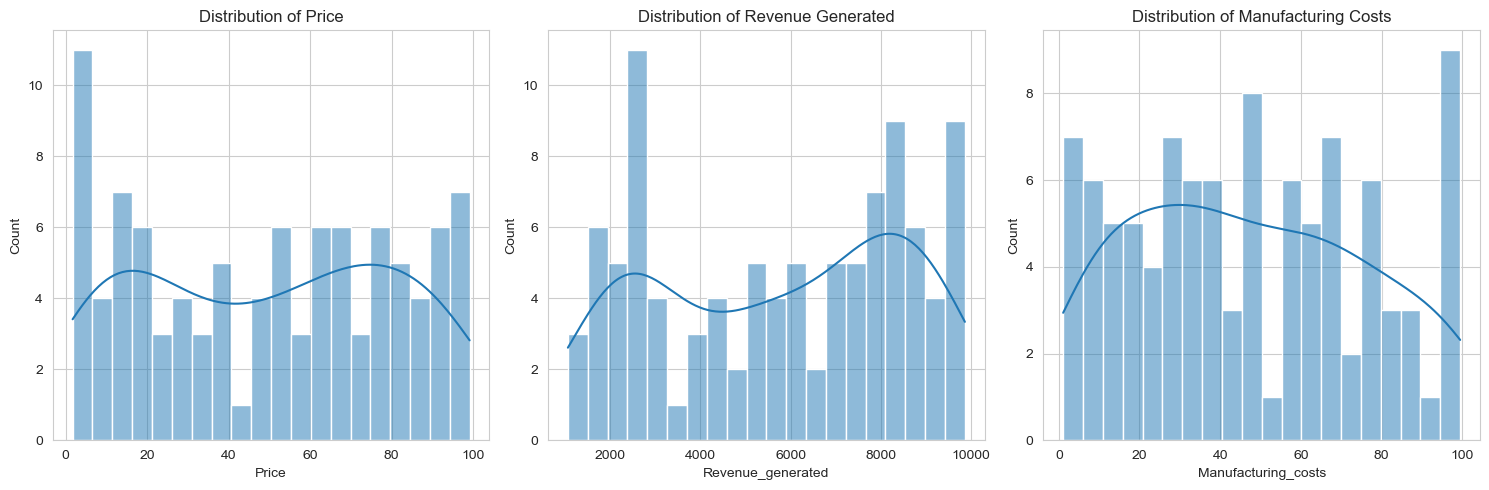

In [34]:
# Set a consistent style for plots
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Distribution of Price
plt.subplot(1, 3, 1)
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')

# Distribution of Revenue generated
plt.subplot(1, 3, 2)
sns.histplot(df['Revenue_generated'], bins=20, kde=True)
plt.title('Distribution of Revenue Generated')

# Distribution of Manufacturing costs
plt.subplot(1, 3, 3)
sns.histplot(df['Manufacturing_costs'], bins=20, kde=True)
plt.title('Distribution of Manufacturing Costs')

plt.tight_layout()
plt.show()


--- Product Type Performance Summary ---
  Product_type  Number_of_products_sold  Revenue_generated  \
2     skincare                    20731      241628.162133   
1     haircare                    13611      174455.390605   
0    cosmetics                    11757      161521.265999   

   Manufacturing_costs      Price  
2            48.993157  47.259329  
1            48.457993  46.014279  
0            43.052740  57.361058  


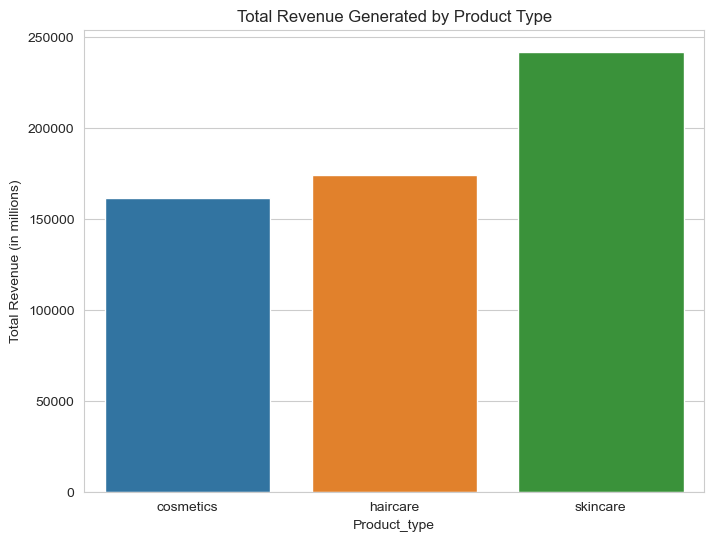

In [8]:
# Aggregate data by Product type
product_performance = df.groupby('Product_type').agg({
    'Number_of_products_sold': 'sum',
    'Revenue_generated': 'sum',
    'Manufacturing_costs': 'mean',
    'Price': 'mean'
}).reset_index()

print("\n--- Product Type Performance Summary ---")
print(product_performance.sort_values(by='Revenue_generated', ascending=False))

# Visualization: Total Revenue by Product Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_type', y='Revenue_generated', data=product_performance)
plt.title('Total Revenue Generated by Product Type')
plt.ylabel('Total Revenue (in millions)')
plt.show()


--- Top 5 Suppliers by Production Volume ---
Supplier_name
Supplier 2    14105
Supplier 1    13545
Supplier 4    11756
Supplier 5     9381
Supplier 3     7997
Name: Production_volumes, dtype: int64

--- Average Lead Time by Location ---
Location
Kolkata      19.440000
Chennai      18.650000
Bangalore    16.277778
Mumbai       15.318182
Delhi        14.600000
Name: Lead_time, dtype: float64


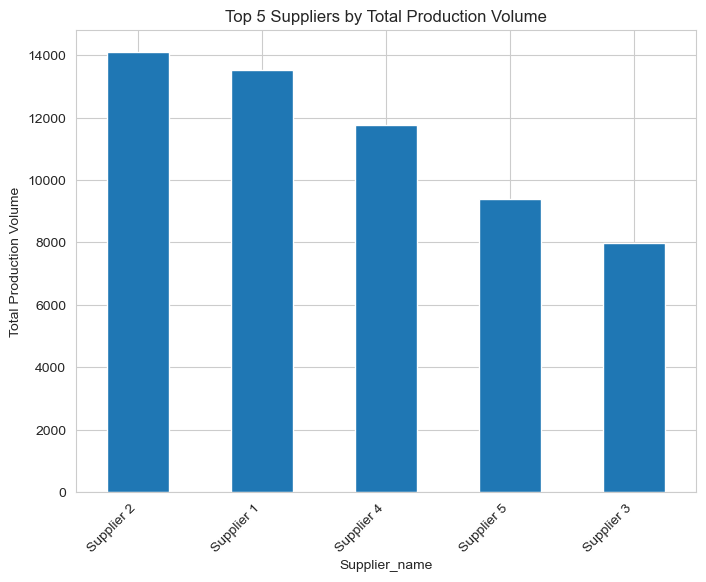

In [9]:
# Analyze Production Volumes by Supplier
supplier_volume = df.groupby('Supplier_name')['Production_volumes'].sum().sort_values(ascending=False).head(5)

# Analyze Average Lead Time by Location
location_lead_time = df.groupby('Location')['Lead_time'].mean().sort_values(ascending=False)

print("\n--- Top 5 Suppliers by Production Volume ---")
print(supplier_volume)

print("\n--- Average Lead Time by Location ---")
print(location_lead_time)

# Visualization: Production Volumes by Supplier (Top 5)
plt.figure(figsize=(8, 6))
supplier_volume.plot(kind='bar')
plt.title('Top 5 Suppliers by Total Production Volume')
plt.ylabel('Total Production Volume')
plt.xticks(rotation=45, ha='right')
plt.show()


--- Average Defect Rates by Inspection Result ---
                        mean  count
Inspection_results                 
Fail                2.569302     36
Pass                2.039043     23
Pending             2.154218     41


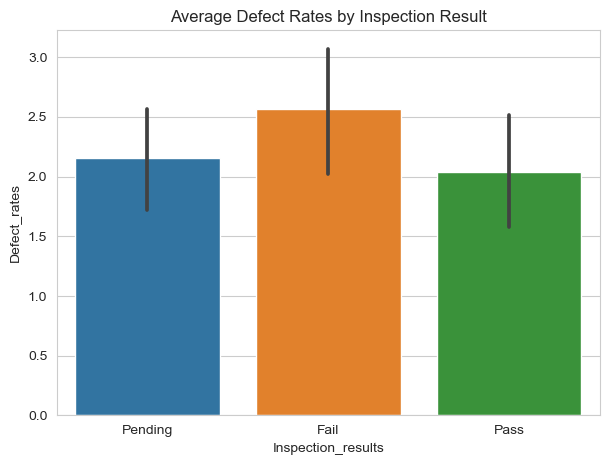

In [10]:
# Group by Inspection results and calculate average Defect rates
inspection_quality = df.groupby('Inspection_results')['Defect_rates'].agg(['mean', 'count'])

print("\n--- Average Defect Rates by Inspection Result ---")
print(inspection_quality)

# Visualization: Defect Rates by Inspection Result
plt.figure(figsize=(7, 5))
sns.barplot(x='Inspection_results', y='Defect_rates', data=df)
plt.title('Average Defect Rates by Inspection Result')
plt.show()


--- Average Shipping Costs by Transportation Mode ---
Transportation_modes
Air     6.017839
Road    5.542115
Rail    5.469098
Sea     4.970294
Name: Shipping_costs, dtype: float64

--- Carrier Performance (Avg. Lead Time, Shipping Time, Cost) ---
  Shipping_carriers  Lead_time  Shipping_times  Shipping_costs
2         Carrier C  17.137931        6.034483        5.599292
0         Carrier A  18.321429        6.142857        5.554923
1         Carrier B  16.232558        5.302326        5.509247


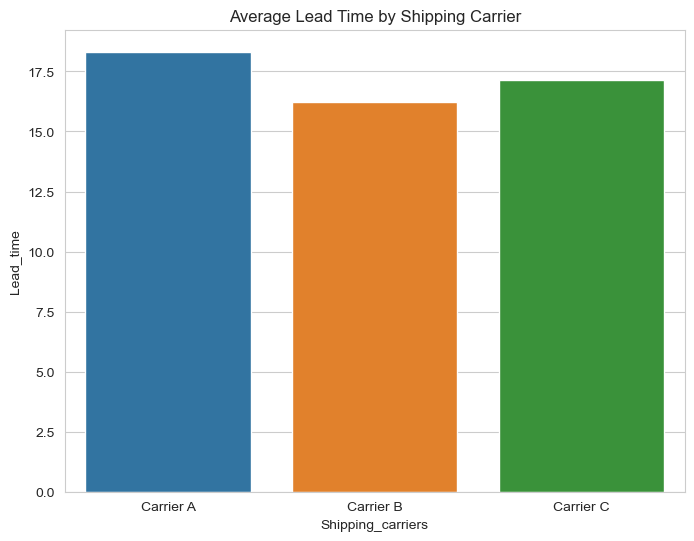

In [11]:
# Analyze Shipping Costs by Transportation Mode
transport_cost = df.groupby('Transportation_modes')['Shipping_costs'].mean().sort_values(ascending=False)

# Analyze Lead Times and Shipping Times by Shipping Carrier
carrier_performance = df.groupby('Shipping_carriers').agg({
    'Lead_time': 'mean',
    'Shipping_times': 'mean',
    'Shipping_costs': 'mean'
}).reset_index()

print("\n--- Average Shipping Costs by Transportation Mode ---")
print(transport_cost)

print("\n--- Carrier Performance (Avg. Lead Time, Shipping Time, Cost) ---")
print(carrier_performance.sort_values(by='Shipping_costs', ascending=False))

# Visualization: Lead Time vs. Shipping Carrier
plt.figure(figsize=(8, 6))
sns.barplot(x='Shipping_carriers', y='Lead_time', data=carrier_performance)
plt.title('Average Lead Time by Shipping Carrier')
plt.show()

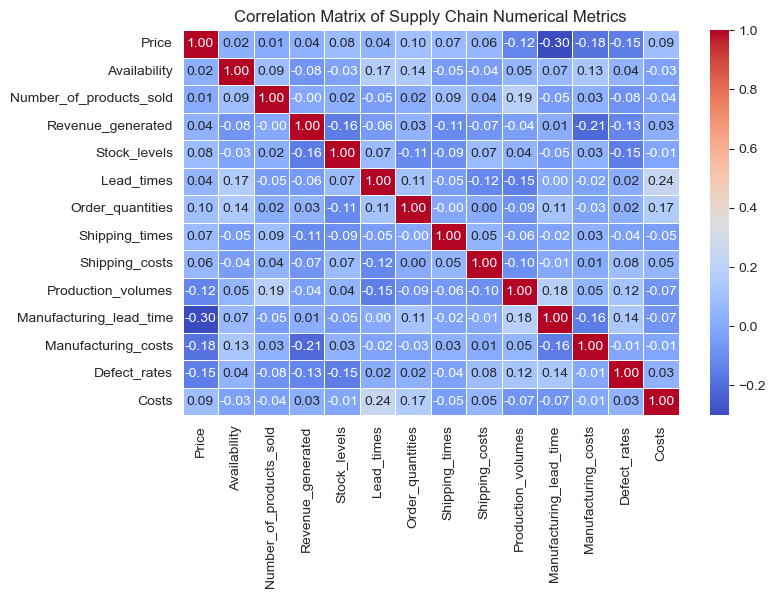

In [50]:
# Select relevant numerical columns for correlation matrix
corr_cols = ['Price', 'Availability', 'Number_of_products_sold', 'Revenue_generated',
             'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
             'Shipping_costs', 'Production_volumes', 'Manufacturing_lead_time',
             'Manufacturing_costs', 'Defect_rates', 'Costs']

correlation_matrix = df[corr_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Supply Chain Numerical Metrics')
plt.show()

--- DataFrame Head with New 'Net_Profit' Column ---
   Revenue_generated       Costs   Net_Profit
0        8661.996792  187.752075  8474.244717
1        7460.900065  503.065579  6957.834486
2        9577.749626  141.920282  9435.829344
3        7766.836426  254.776159  7512.060266
4        2686.505152  923.440632  1763.064520


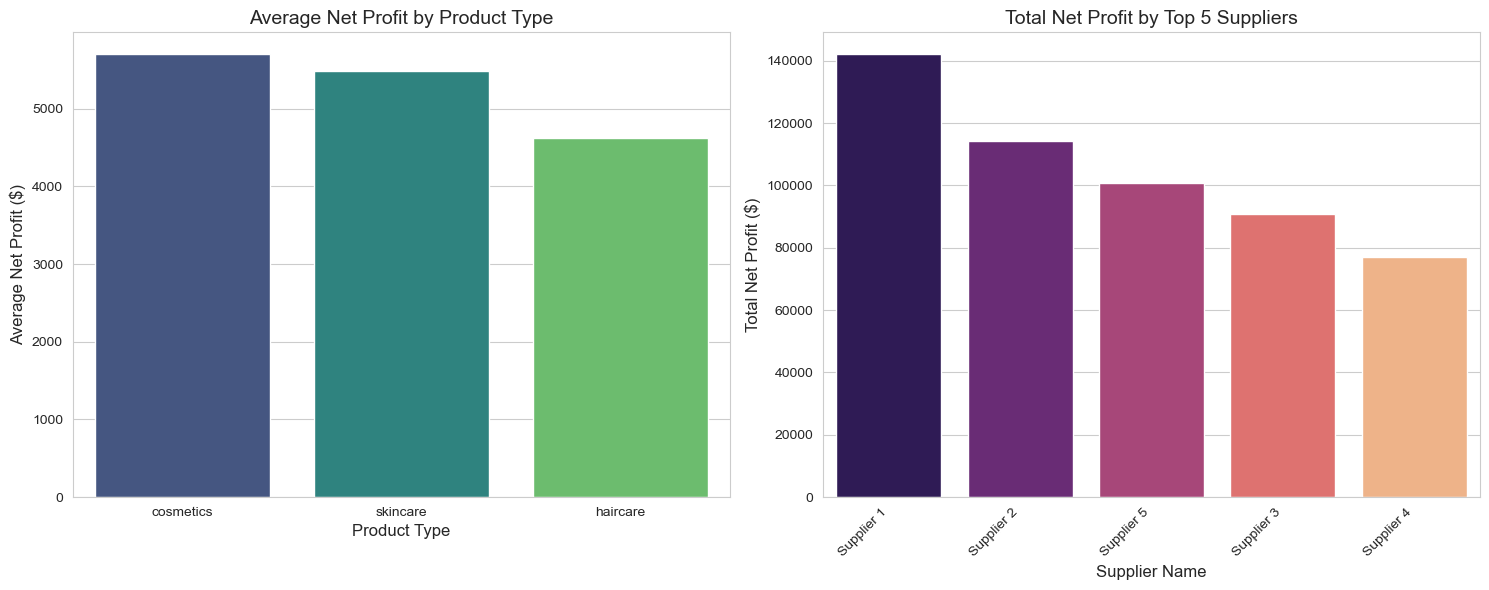

In [13]:
# Profitability Analysis

# Calculate Net Profit
df['Net_Profit'] = df['Revenue_generated'] - df['Costs']

print("--- DataFrame Head with New 'Net_Profit' Column ---")
print(df[['Revenue_generated', 'Costs', 'Net_Profit']].head())

# Aggregate average net profit by Product Type
profit_by_product = df.groupby('Product_type')['Net_Profit'].mean().sort_values(ascending=False).reset_index()

# Aggregate total net profit by Supplier (Top 5)
profit_by_supplier = df.groupby('Supplier_name')['Net_Profit'].sum().sort_values(ascending=False).head(5).reset_index()

# Plotting Profitability
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Plot 1: Average Net Profit by Product Type
plt.subplot(1, 2, 1)
sns.barplot(x='Product_type', y='Net_Profit', data=profit_by_product, palette='viridis')
plt.title('Average Net Profit by Product Type', fontsize=14)
plt.ylabel('Average Net Profit ($)', fontsize=12)
plt.xlabel('Product Type', fontsize=12)

# Plot 2: Total Net Profit by Supplier (Top 5)
plt.subplot(1, 2, 2)
sns.barplot(x='Supplier_name', y='Net_Profit', data=profit_by_supplier, palette='magma')
plt.title('Total Net Profit by Top 5 Suppliers', fontsize=14)
plt.ylabel('Total Net Profit ($)', fontsize=12)
plt.xlabel('Supplier Name', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


--- Average Time Components by Location (in days) ---
           Avg. Manufacturing Lead Time  Avg. Shipping Time  \
Location                                                      
Delhi                         13.533333            5.933333   
Chennai                       12.650000            6.000000   
Kolkata                       15.000000            5.960000   
Bangalore                     11.777778            5.277778   
Mumbai                        19.727273            5.545455   

           Avg. Total Lead Time  
Location                         
Delhi                 17.666667  
Chennai               17.150000  
Kolkata               15.920000  
Bangalore             15.333333  
Mumbai                14.272727  


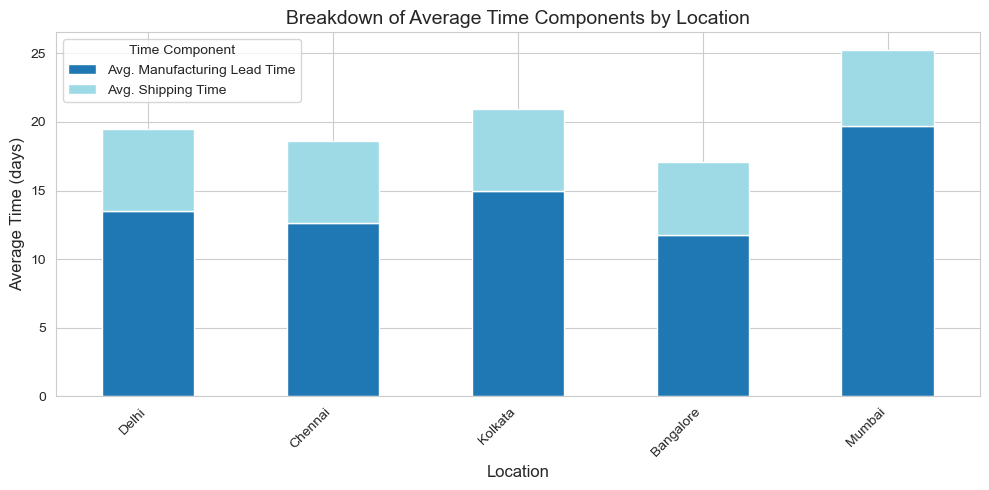

In [52]:
#Lead Time Analysis (Critical Path)
# Aggregate average time components by Location
time_components = df.groupby('Location').agg({
    'Manufacturing_lead_time': 'mean',
    'Shipping_times': 'mean',
    'Lead_times': 'mean'
}).sort_values(by='Lead_times', ascending=False)

# Rename columns for better visualization labels
time_components.columns = ['Avg. Manufacturing Lead Time', 'Avg. Shipping Time', 'Avg. Total Lead Time']

print("\n--- Average Time Components by Location (in days) ---")
print(time_components)

# Plotting Lead Time Components
time_components_plot = time_components[['Avg. Manufacturing Lead Time', 'Avg. Shipping Time']].plot(
    kind='bar', stacked=True, figsize=(10, 5), colormap='tab20'
)
plt.title('Breakdown of Average Time Components by Location', fontsize=14)
plt.ylabel('Average Time (days)', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time Component')
plt.tight_layout()
plt.show() 

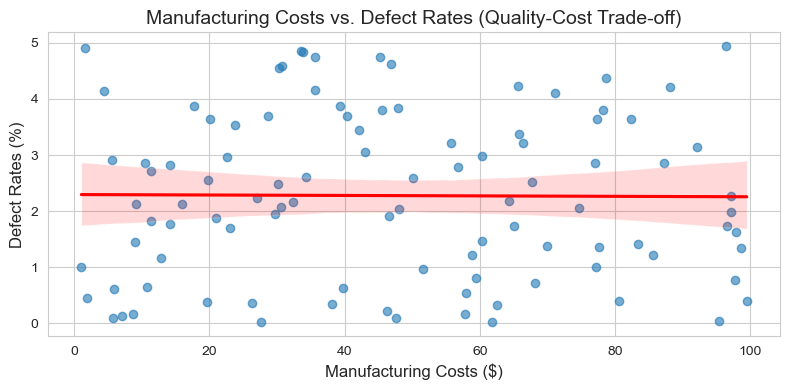

In [54]:
#Manufacturing Cost vs. Defect Rate (Quality-Cost Trade-off)
# Scatter plot with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Manufacturing_costs', y='Defect_rates', data=df,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Manufacturing Costs vs. Defect Rates (Quality-Cost Trade-off)', fontsize=14)
plt.xlabel('Manufacturing Costs ($)', fontsize=12)
plt.ylabel('Defect Rates (%)', fontsize=12)
plt.tight_layout()
plt.show()